<a href="https://colab.research.google.com/github/lauxpaux/HousingMarketPredictor/blob/main/property_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import plotly as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Real_Estate_Sales_2001-2021_GL.csv')

In [3]:
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.4096,Residential,Single Family,NaN,NaN,NaN,POINT (-72.846365959 41.781677018)
3,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
4,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062789 entries, 0 to 1062788
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1062789 non-null  int64  
 1   List Year         1062789 non-null  int64  
 2   Date Recorded     1062787 non-null  object 
 3   Town              1062789 non-null  object 
 4   Address           1062738 non-null  object 
 5   Assessed Value    1062789 non-null  object 
 6   Sale Amount       1062788 non-null  float64
 7   Sales Ratio       1062788 non-null  float64
 8   Property Type     679613 non-null   object 
 9   Residential Type  668176 non-null   object 
 10  Non Use Code      305157 non-null   object 
 11  Assessor Remarks  163575 non-null   object 
 12  OPM remarks       11893 non-null    object 
 13  Location          256168 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 113.5+ MB


In [5]:
df.describe()

,Serial Number,List Year,Sale Amount,Sales Ratio
count,1.062789e+06,1.062789e+06,1.062788e+06,1.062788e+06
mean,5.014916e+05,2.010821e+03,4.000439e+05,9.888797e+00
std,7.207285e+06,6.535384e+00,5.239775e+06,1.830957e+03
min,0.000000e+00,2.001000e+03,0.000000e+00,0.000000e+00
25%,3.057600e+04,2.004000e+03,1.420000e+05,4.824400e-01
50%,8.012700e+04,2.011000e+03,2.300000e+05,6.171000e-01
75%,1.610250e+05,2.017000e+03,3.700000e+05,7.768293e-01
max,2.000500e+09,2.021000e+03,5.000000e+09,1.226420e+06


Determining the ratio of nulls in the data frame for each column. The columns 'OPM remarks', 'Assessor Remarks', 'Location', and 'Non Use Code' are missing over 70% of the entries. These columns will be dropped.

In [6]:
df.isna().sum()/len(df.index) * 100

Serial Number        0.000000
List Year            0.000000
Date Recorded        0.000188
Town                 0.000000
Address              0.004799
Assessed Value       0.000000
Sale Amount          0.000094
Sales Ratio          0.000094
Property Type       36.053817
Residential Type    37.129948
Non Use Code        71.287151
Assessor Remarks    84.608892
OPM remarks         98.880963
Location            75.896627
dtype: float64

In [7]:
df.drop(['OPM remarks', 'Location', 'Assessor Remarks', 'Non Use Code'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062789 entries, 0 to 1062788
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1062789 non-null  int64  
 1   List Year         1062789 non-null  int64  
 2   Date Recorded     1062787 non-null  object 
 3   Town              1062789 non-null  object 
 4   Address           1062738 non-null  object 
 5   Assessed Value    1062789 non-null  object 
 6   Sale Amount       1062788 non-null  float64
 7   Sales Ratio       1062788 non-null  float64
 8   Property Type     679613 non-null   object 
 9   Residential Type  668176 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 81.1+ MB


## Data Cleaning:

In [9]:
df.isna().sum()

Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              1
Sales Ratio              1
Property Type       383176
Residential Type    394613
dtype: int64

#### Column: 'Date Recorded'

Let's investigate the missing values in our dataset. Starting with 'Date Recorded', we can see below that there are two entries with missing dates that are also missing most of the other columns. We will be dropping these two rows.

In [10]:
df[df['Date Recorded'].isna()]


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
234863,20280,2002,NaN,Orange,NaN,0.0,0.0,0.0,NaN,NaN
236356,0,2002,NaN,Orange,NaN,0.0,0.0,0.0,NaN,NaN


In [11]:
df.drop([234863, 236356], inplace=True)

In [12]:
df.isna().sum()

Serial Number            0
List Year                0
Date Recorded            0
Town                     0
Address                 49
Assessed Value           0
Sale Amount              1
Sales Ratio              1
Property Type       383174
Residential Type    394611
dtype: int64

#### Column: 'Address'

We have 49 rows where the 'Address' feature is missing. Additionally the 'Property Type', 'Residential Type' and other features are also missing from these rows. Given that they are so few rows missing a lot of the data, we will also drop these.

In [13]:
missing_address = df[df['Address'].isna()]
missing_address.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
75944,39999,2003,02/02/2004,West Haven,NaN,0.0,0.0,0.000000,NaN,NaN
89004,49996,2004,05/17/2005,Lisbon,NaN,0.0,0.0,0.000000,NaN,NaN
101602,48886,2004,06/13/2005,Lisbon,NaN,0.0,0.0,0.000000,NaN,NaN
145969,10537,2001,02/05/2002,Hartford,NaN,0.0,120000.0,0.000000,NaN,NaN
149638,10640,2001,12/19/2001,Bridgeport,NaN,2106020.0,45000.0,46.800444,NaN,NaN


In [14]:
df.dropna(subset=['Address'], inplace=True)

In [15]:
df.isna().sum()

Serial Number            0
List Year                0
Date Recorded            0
Town                     0
Address                  0
Assessed Value           0
Sale Amount              1
Sales Ratio              1
Property Type       383129
Residential Type    394566
dtype: int64

Cleaning todos:
* See about imputing property and residential type
* Reset index of df after dropping rows

In [16]:
df['Property Type'].value_counts()

Property Type
Single Family     407481
Residential       112099
Condo             106910
Two Family         26759
Three Family       12743
Vacant Land         5746
Commercial          4208
Four Family         2179
Apartments           943
Industrial           533
Public Utility         8
Name: count, dtype: int64

In [20]:
df[df['Property Type'].isna()]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
58,10095,2001,11/16/2001,Farmington,5 SPARROW LN,67670.0,302866.0,0.223432,NaN,NaN
60,11238,2001,08/30/2002,Bethel,50 FOURTH ST,76450.0,50000.0,1.529000,NaN,NaN
61,10035,2001,06/28/2002,Chaplin,FEDERAL RD,19000.0,35000.0,0.542857,NaN,NaN
62,10115,2001,02/01/2002,Clinton,42 PRATT RD,121900.0,230000.0,0.530000,NaN,NaN
71,10041,2001,07/17/2002,Eastford,WESTFORD RD,180.0,5000.0,0.036000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1062733,19150,2019,01/13/2020,Newtown,22 WASHINGTON AVENUE,53640.0,122500.0,0.437900,NaN,NaN
1062741,190242,2019,09/18/2020,Weston,OLD HYDE ROAD,181440.0,150000.0,1.209600,NaN,NaN
1062742,19000067,2019,05/19/2020,New Hartford,LOT 2 DINGS RD,87955.0,35000.0,2.513000,NaN,NaN
1062750,190713,2019,06/01/2020,New Haven,1083 WHALLEY AV,262220.0,325000.0,0.806800,NaN,NaN


## EDA

Questions:
* Plot distributions
* What is the average housing price?
* Plot residential and property type
* Plot scatter plot of the whole state based on price
* Which towns are more expensive?
* Which are cheaper?
* How many unique towns are there?
* Can we engineer counties?
* Calculate average price per county?
* Engineer a feature that categorizes home as low, mid, high for pricing per county
* Compare assessed value to sale amount: How much do people tend to pay over?
* Are there counties that people tend to pay less than assessed price?
* Is there a seasonal component to buying? If so, which season sells more houses?
* In what year was the biggest difference between assessed and sale price observed?


## Preprocessing:

Splitting our data between Train/Test sets for timeseries, first setting the date as the index.

In [9]:
df['sold_date'] = pd.to_datetime(df['Date Recorded'])

In [11]:
df.set_index('sold_date', inplace=True)
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
sold_date,,,,,,,,,,
2021-09-13,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN
2020-10-02,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family
2022-07-05,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.4096,Residential,Single Family
2021-03-09,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo
2021-04-13,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family


In [12]:
df.sort_index(inplace=True)
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
sold_date,,,,,,,,,,
1999-04-05,170177,2017,04/05/1999,New London,184 PEQUOT AVE 309,46690.0,95000.0,0.491400,Condo,Condo
2001-08-01,173165,2017,08/01/2001,Shelton,19 BLACKBERRY LA,390810.0,635000.0,0.615449,Single Family,Single Family
2001-08-23,173202,2017,08/23/2001,Shelton,12 BOYSENBERRY LA,427910.0,558000.0,0.766864,Single Family,Single Family
2001-09-04,60626,2006,09/04/2001,Newington,110 MOYLAN CT,64750.0,88000.0,0.735795,Condo,Condo
2001-09-05,60631,2006,09/05/2001,Newington,48 EVERGREEN RD,166110.0,256000.0,0.648867,Single Family,Single Family


In [14]:
X = df.drop(labels=['Sale Amount'], axis=1)
y = df['Sale Amount']

In [13]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits=3)

In [15]:
for train_index, test_index in tss.split(X):
  X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [16]:
X_train.index

DatetimeIndex(['1999-04-05', '2001-08-01', '2001-08-23', '2001-09-04',
               '2001-09-05', '2001-09-25', '2001-10-01', '2001-10-01',
               '2001-10-01', '2001-10-01',
               ...
               '2018-02-14', '2018-02-14', '2018-02-14', '2018-02-14',
               '2018-02-14', '2018-02-14', '2018-02-14', '2018-02-14',
               '2018-02-14', '2018-02-14'],
              dtype='datetime64[ns]', name='sold_date', length=790620, freq=None)

In [17]:
X_test.index

DatetimeIndex(['2018-02-14', '2018-02-14', '2018-02-14', '2018-02-14',
               '2018-02-14', '2018-02-14', '2018-02-14', '2018-02-14',
               '2018-02-14', '2018-02-14',
               ...
               '2022-09-30', '2022-09-30', '2022-09-30', '2022-09-30',
               '2022-09-30', '2022-09-30', '2022-09-30', '2022-09-30',
                      'NaT',        'NaT'],
              dtype='datetime64[ns]', name='sold_date', length=263539, freq=None)

#### Plotting training and test data below we that there data is arranged in chronological order with the test being later in time.
Todo: Optimize the plot below

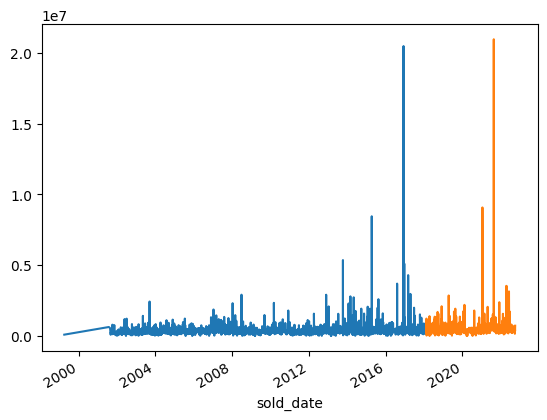

In [20]:
y_train.groupby('sold_date').mean().plot()
y_test.groupby('sold_date').mean().plot();

In [ ]:
df['Property Type'].unique()

In [ ]:
def plot_unique_vals(data, col, title, x_label, y_label):
    '''
    Plots the unique values of each column.
    Takes in data, col, title, x_label, and y_label as variables:

    Inputs:
    data = dataframe
    col = column in the dataframe of interest
    title = title of the plot
    x_label = x axis label of the plot
    y_label = y axis label of the plot

    Outputs:
    A bar plot of the unique values in column

    '''
    fig = sns.barplot(data[col].value_counts(), orient='h').set_title(title)
    # add additional title, xlabel and ylabel variables

In [ ]:
plot_unique_vals(df, 'Property Type', 'Property Type Distribution', 'Property Type', 'Count')

In [ ]:
plot_unique_vals(df, 'Residential Type', 'Residential Type Distribution', 'Residential Type', 'Count');

In [ ]:
df.info()

Let's check for duplicate entries:

In [ ]:
df.duplicated().sum()

In [ ]:
sns.histplot(df)